<h1><center>Machine Learning as way to improve ITSM processes</center></h1>

## Business Case

In [278]:
# correct the business case

ABC Tech is an mid-size organisation operation in IT-enabled business segment over a decade.
ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor.
4 key areas, where ML can help ITSM process in ABC Tech.
1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.
2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.
3. Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.
4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

## Domain Analysis

In [279]:
#  give explainations

* CI_Name - SUB000508
* CI_Cat - subapplication
* CI_Subcat - Web Based Application
* WBS - WBS000162
* Incident_ID - IM0000004
* Status - Closed
* Impact - 4
* Urgency - 4
* Priority - 4
* Category - incident
* KB_number - KM0000553
* Alert_Status - closed
* No_of_Reassignments - 26
* Open_Time - 05/02/2012 13:32:57
* Reopen_Time
* Resolved_Time - 04/11/2013 13:50:27
* Close_Time - 04/11/2013 13:51:17
* Handle_Time_hrs - 3871,691111
* Closure_Code - Other
* No_of_Related_Interactions - 1
* Related_Interaction - SD0000007
* No_of_Related_Incidents - 2
* No_of_Related_Changes - 1
* Related_Change - C00000056

In [280]:
# pip install -

In [281]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools
import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [282]:
connection=mysql.connector.connect(host='18.136.157.135',
                                    user='dm_team',
                                    password='DM!$Team@&27920!',
                                    database= "project_itsm")
    


In [283]:
db_tables = pd.read_sql_query('show tables', connection)
print(db_tables)

  Tables_in_project_itsm
0      dataset_list     


In [284]:
df = pd.read_sql_query('SELECT * FROM dataset_list',connection)

In [285]:
pd.set_option('display.max_columns',None)

In [286]:
# df.to_csv('ABCtech.csv',index=False)

In [287]:
df=pd.read_csv('ABCtech.csv')

In [288]:
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,incident,KM0001314,closed,0.0,31-03-2014 16:23,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,incident,KM0002360,closed,0.0,31-03-2014 15:03,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,incident,KM0000315,closed,0.0,31-03-2014 15:28,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,incident,KM0001287,closed,0.0,31-03-2014 15:35,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


In [289]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [291]:
df.describe()

,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [292]:
df.describe(include='O')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,KB_number,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46606,2284,44826,46606,46605,46146,46606,560
unique,3019,12,64,274,46606,2,6,11,4,1825,1,34636,2244,33627,34528,30638,14,43060,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,incident,KM0001106,closed,24-03-2014 08:54,29-10-2013 15:03,10-10-2013 12:53,02-10-2013 15:20,0,Other,#MULTIVALUE,C00003013
freq,3050,32900,18811,13342,1,46597,22556,15526,37748,1106,46606,7,2,7,21,236,16470,3434,110


In [293]:
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,incident,KM0001314,closed,0.0,31-03-2014 16:23,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,incident,KM0002360,closed,0.0,31-03-2014 15:03,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,incident,KM0000315,closed,0.0,31-03-2014 15:28,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,incident,KM0001287,closed,0.0,31-03-2014 15:35,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


### Exploratory Data Analysis

In [294]:
numerical_data=df.select_dtypes(exclude="O").columns
categorical_data=df.select_dtypes(include="O").columns

In [295]:
categorical_data

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Category', 'KB_number', 'Alert_Status',
       'Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time',
       'Handle_Time_hrs', 'Closure_Code', 'Related_Interaction',
       'Related_Change'],
      dtype='object')

In [296]:
values_to_remov=["CI_Name", 'WBS', 'Incident_ID', 'KB_number',
       'Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time',
       'Handle_Time_hrs',  'Related_Interaction',
       'Related_Change']

In [297]:
col_without=[col for col in categorical_data if col not in values_to_remov]

In [298]:
col_without

['CI_Cat',
 'CI_Subcat',
 'Status',
 'Impact',
 'Urgency',
 'Category',
 'Alert_Status',
 'Closure_Code']

In [299]:
numerical_data

Index(['Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes'],
      dtype='object')

In [300]:
len(numerical_data)

6

In [301]:
len(categorical_data)

19

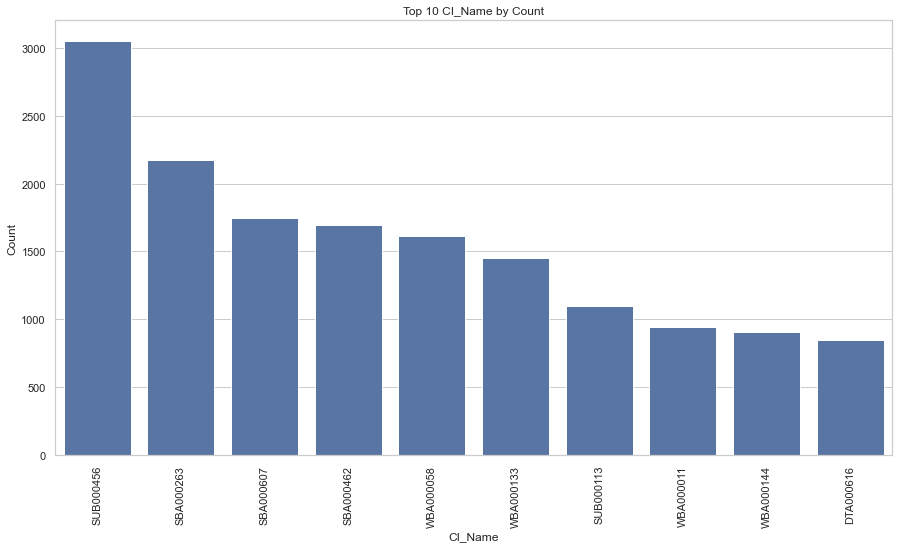

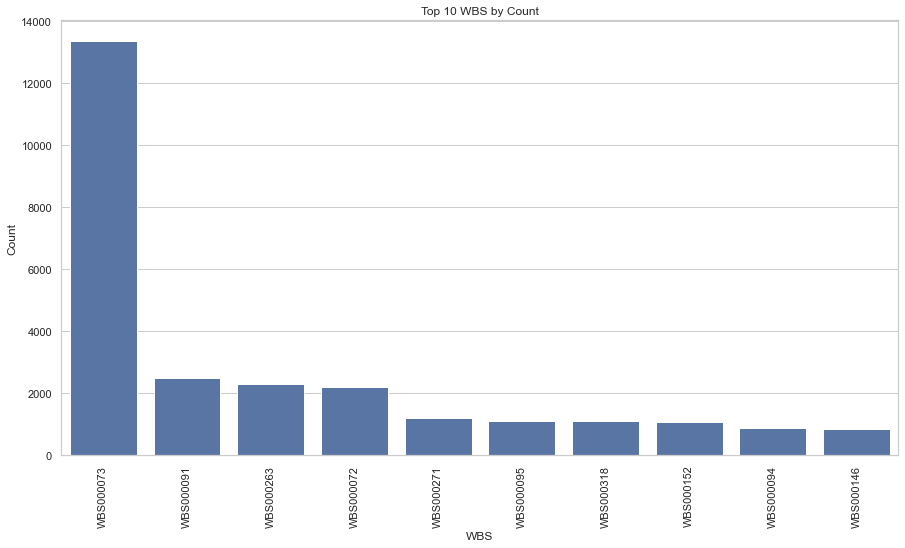

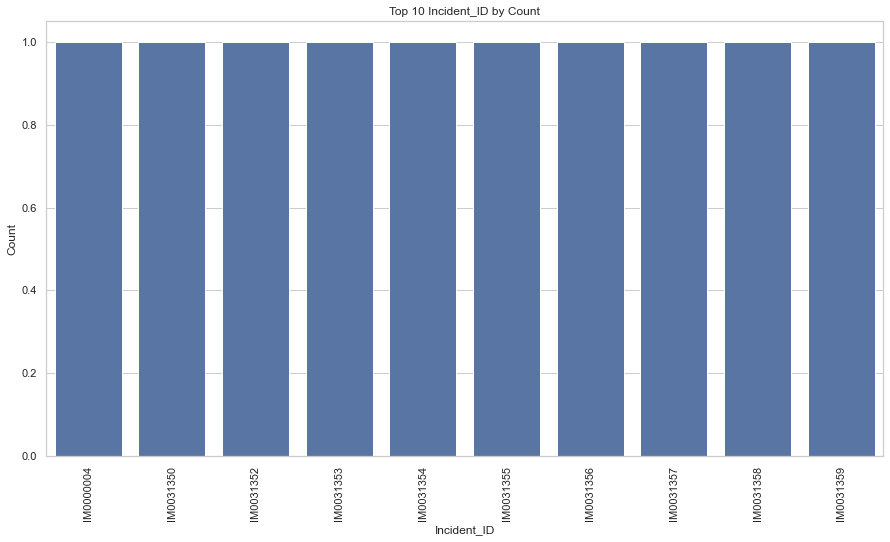

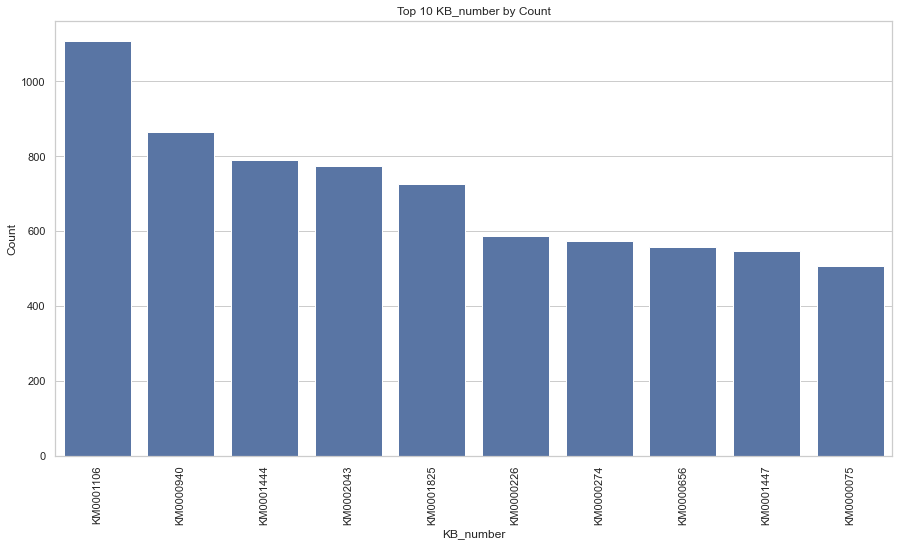

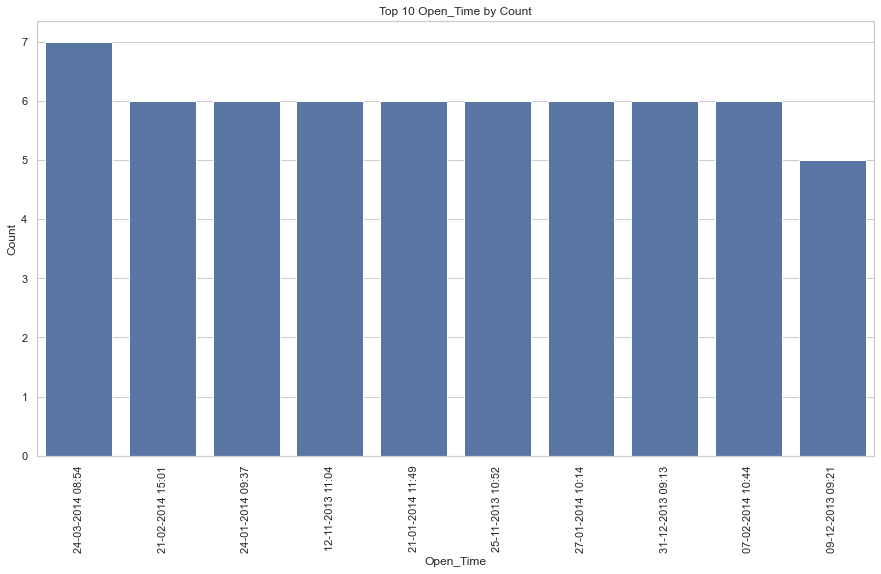

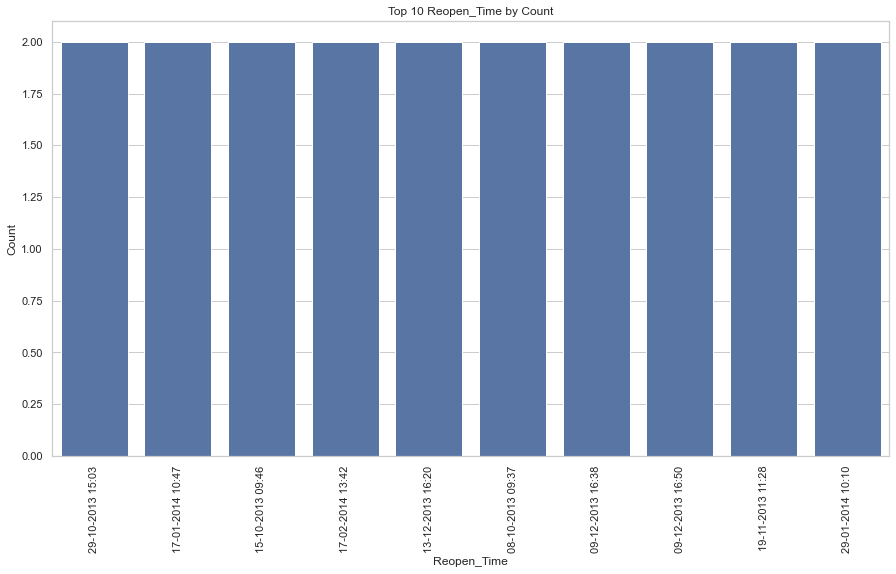

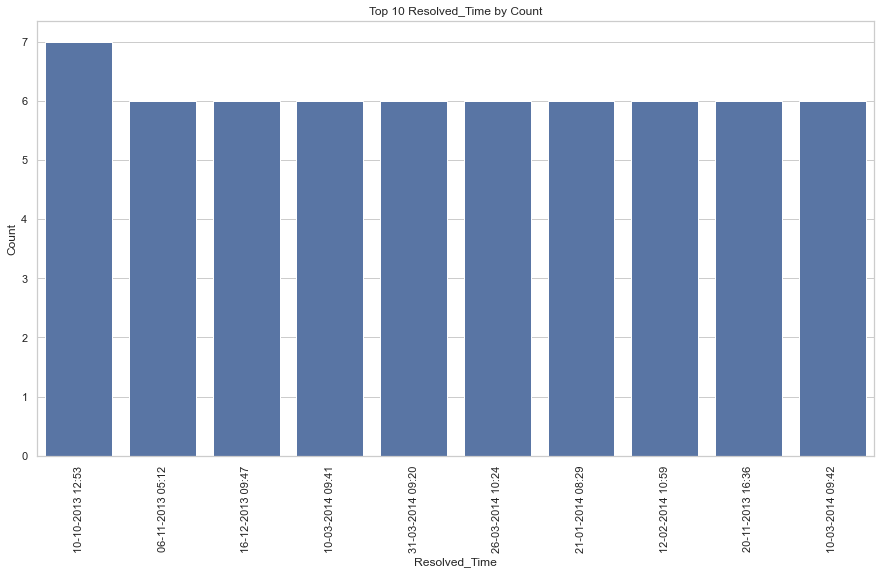

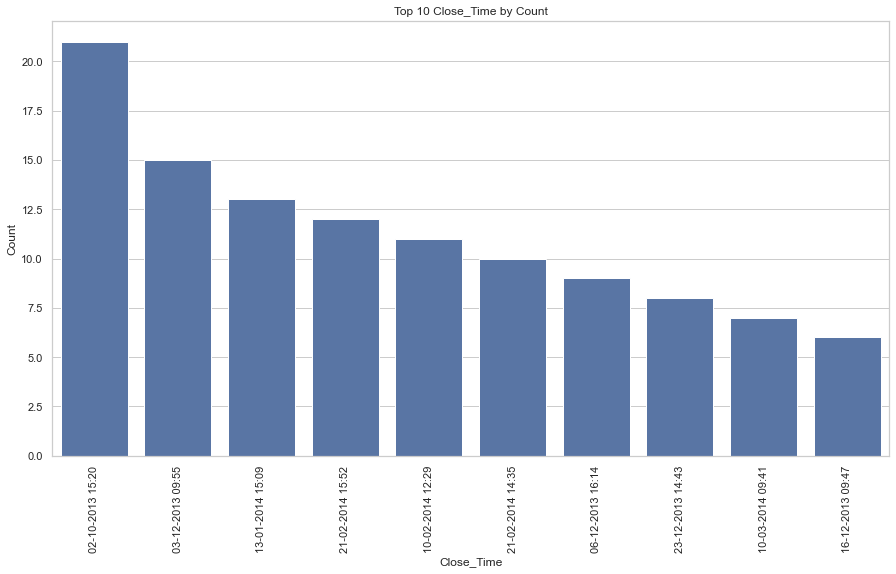

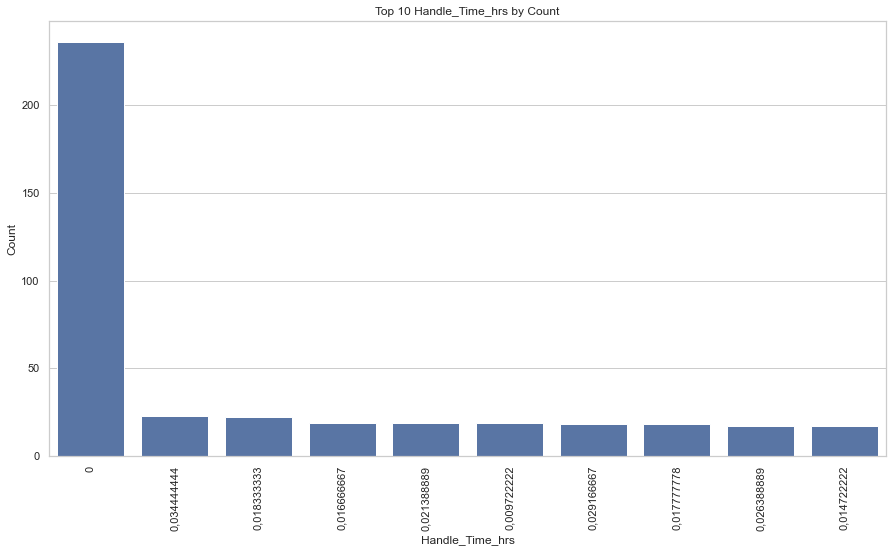

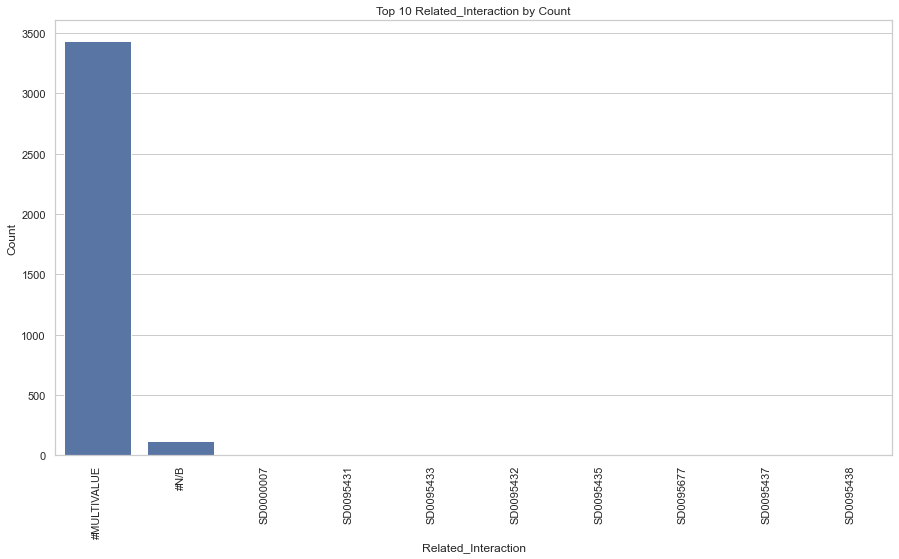

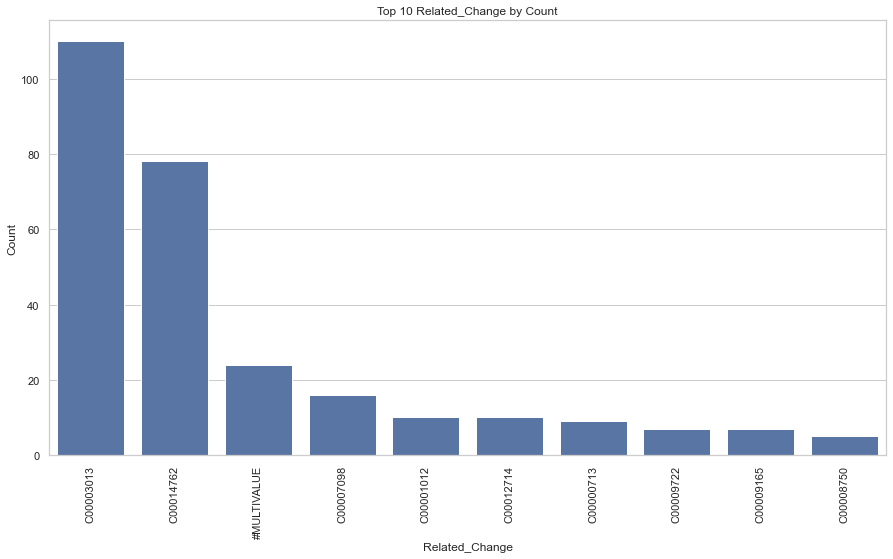

In [302]:
for col in values_to_remov:
# Calculate counts for each nationality
    unique_counts = df[col].value_counts()

    # Select top 10 countries
    top_10_unique = unique_counts.head(10)

    # Plot the countplot for top 10 countries
    plt.figure(figsize=(15, 8))
    sns.barplot(x=top_10_unique.index, y=top_10_unique.values)
    plt.title(f'Top 10 {col} by Count')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation='vertical')
    plt.show()

Related_Change, Related_interaction, 

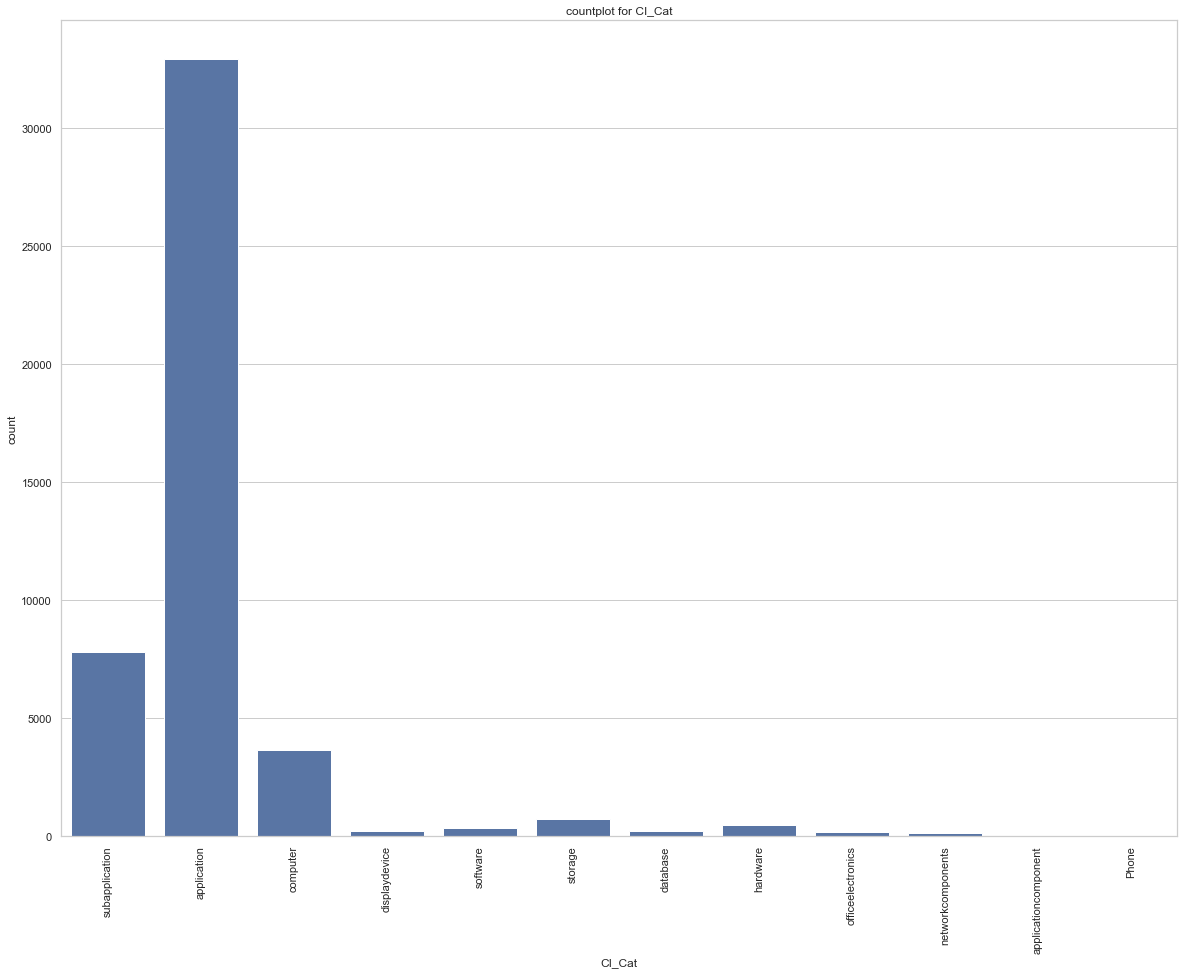

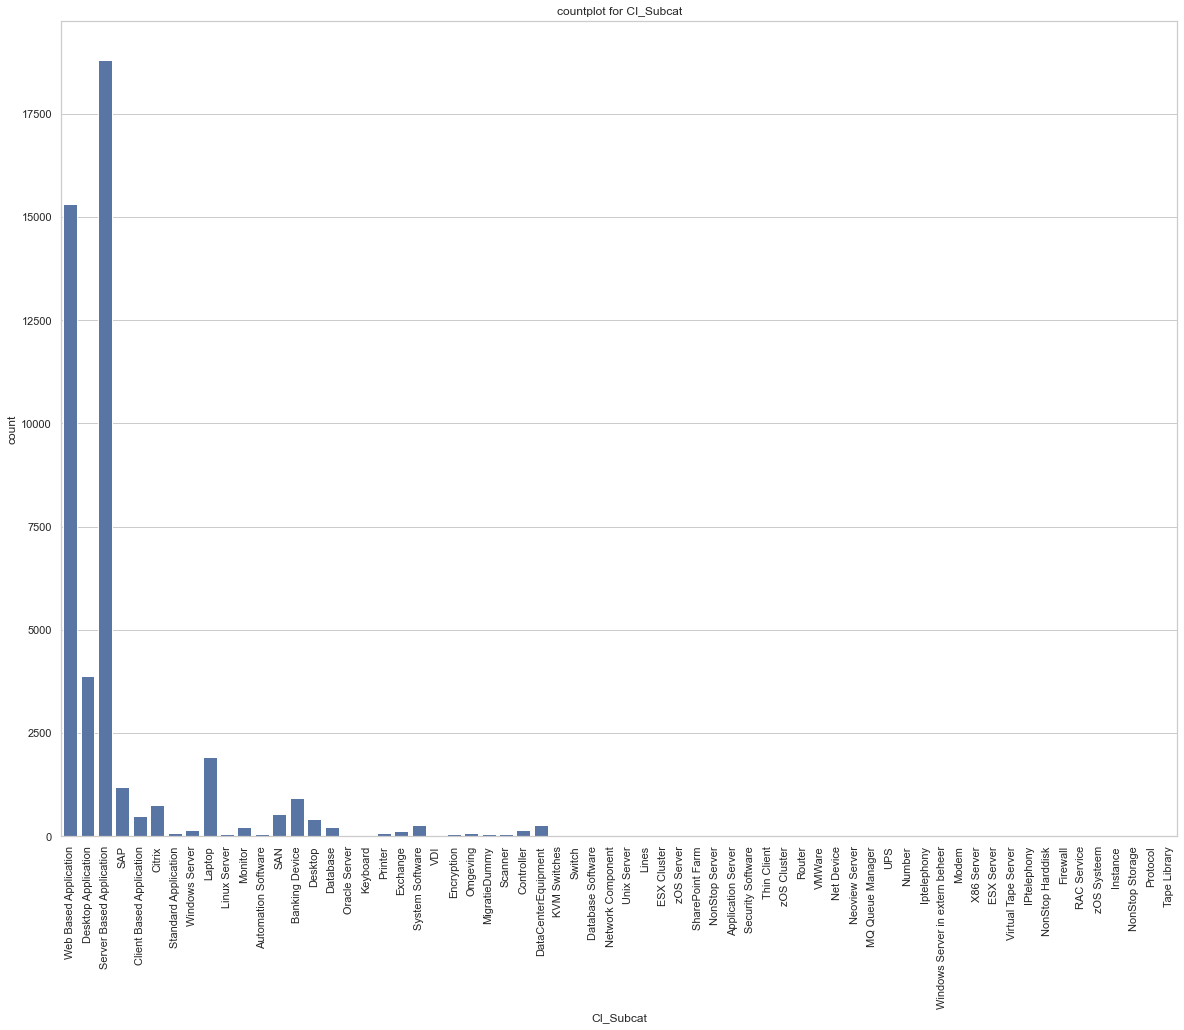

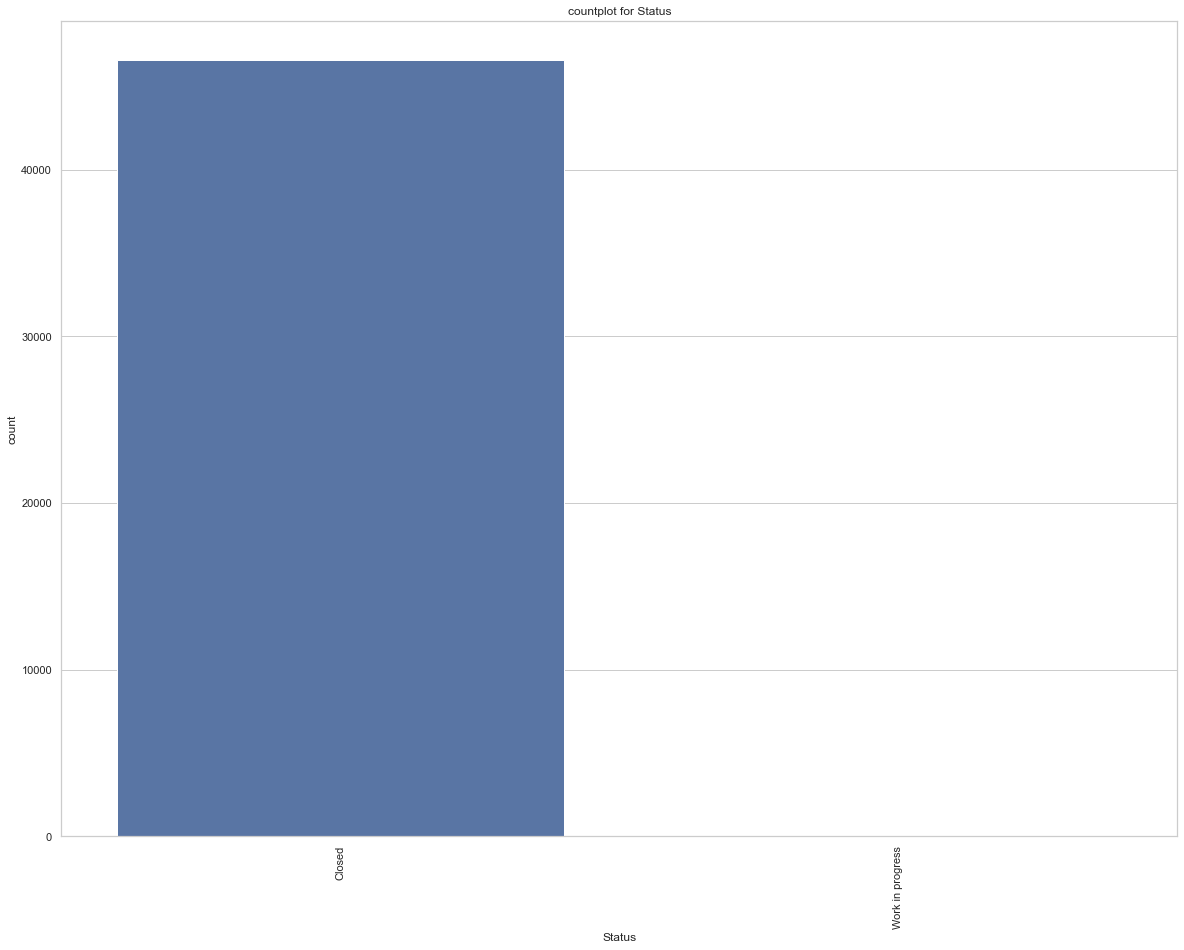

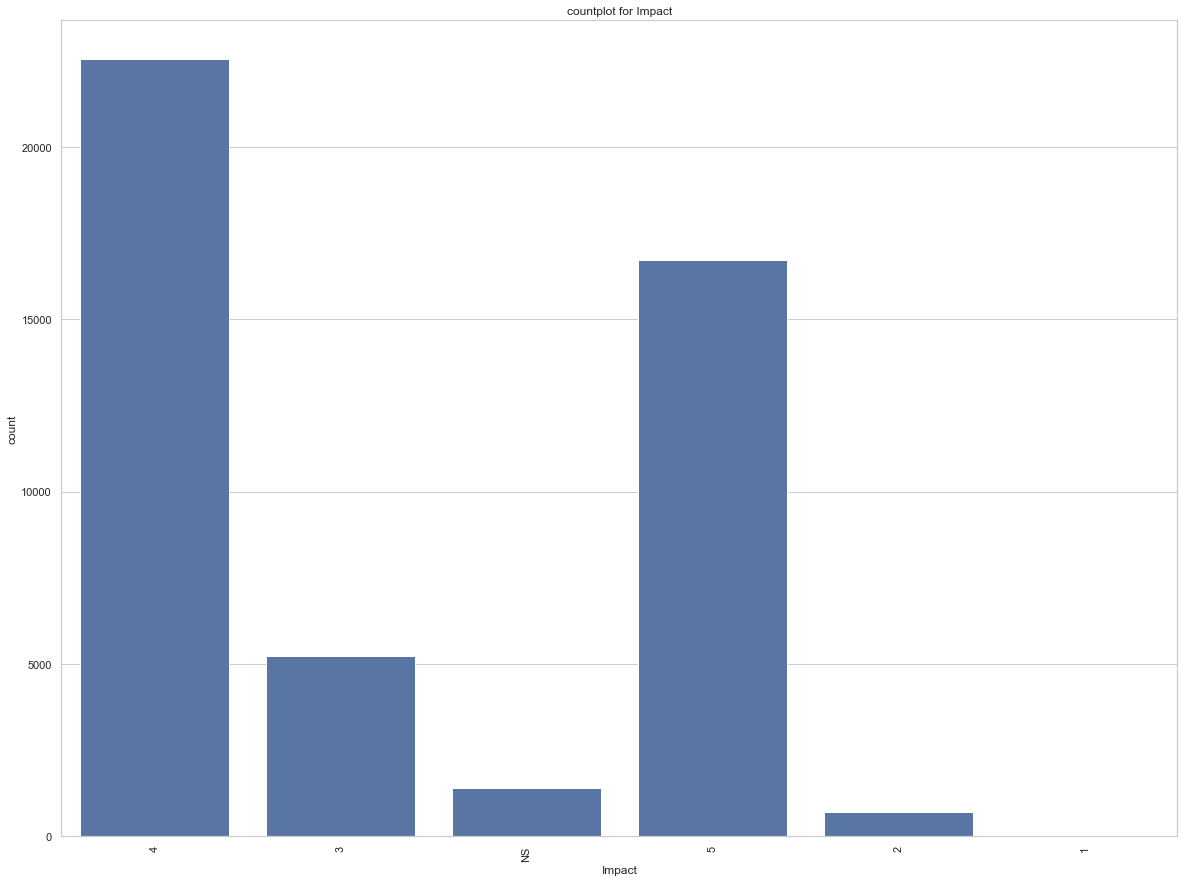

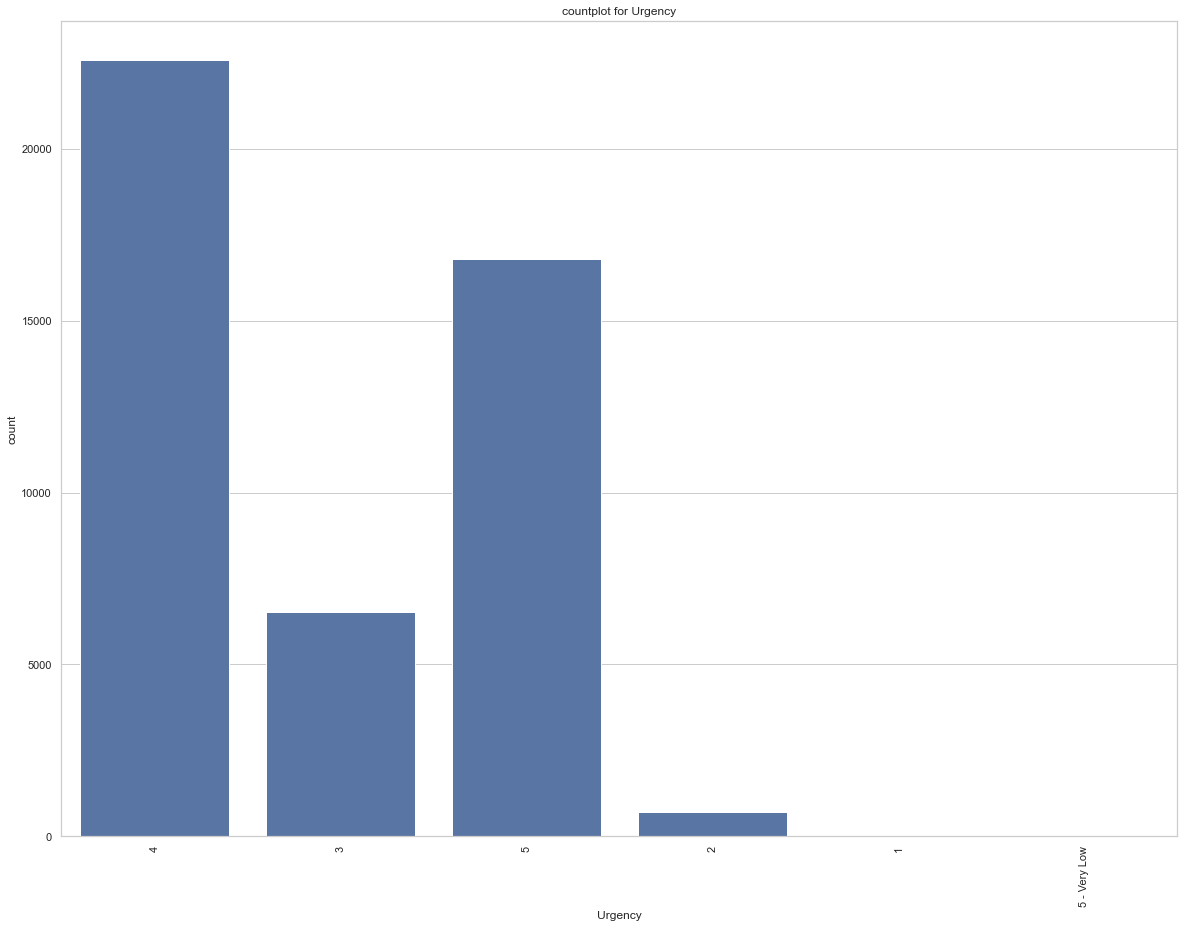

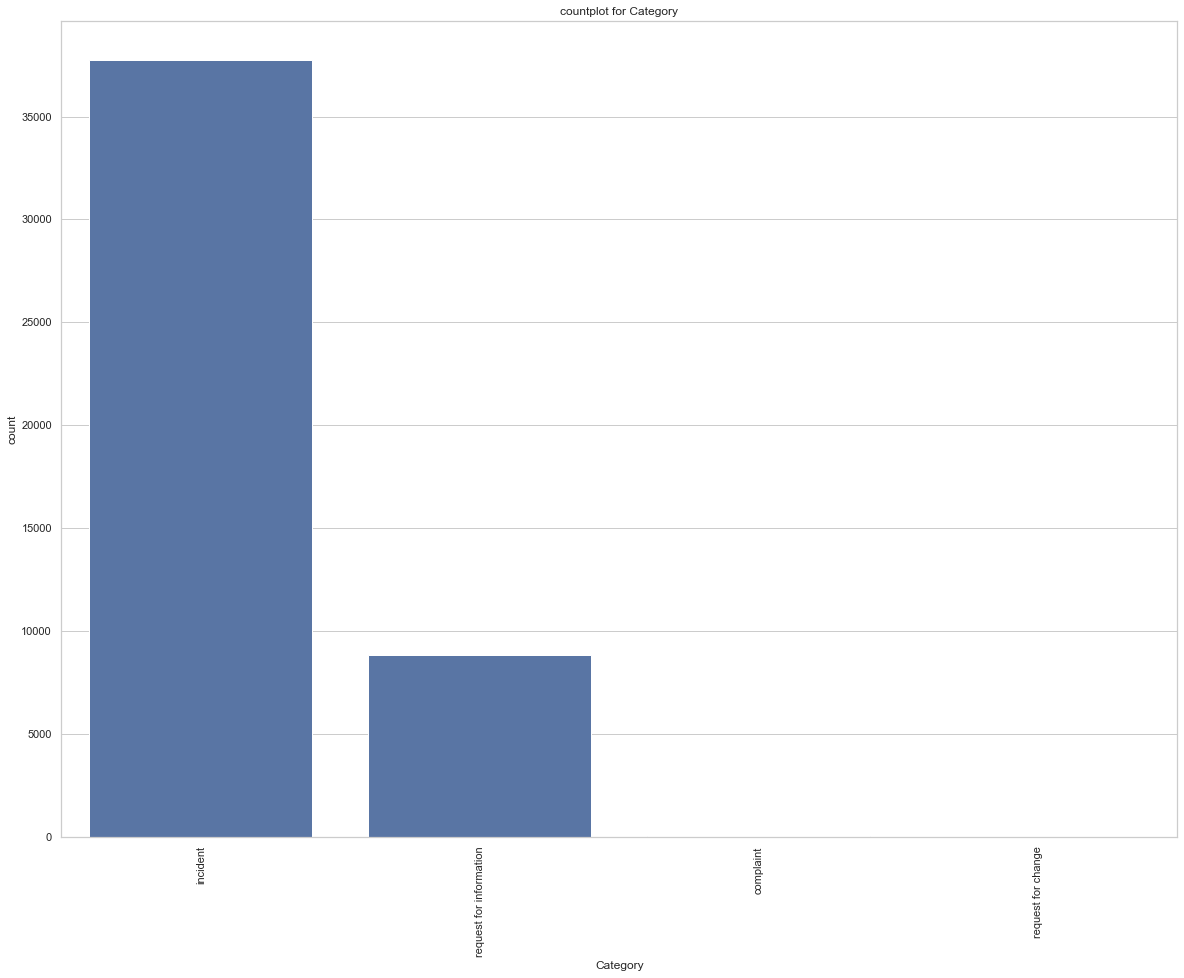

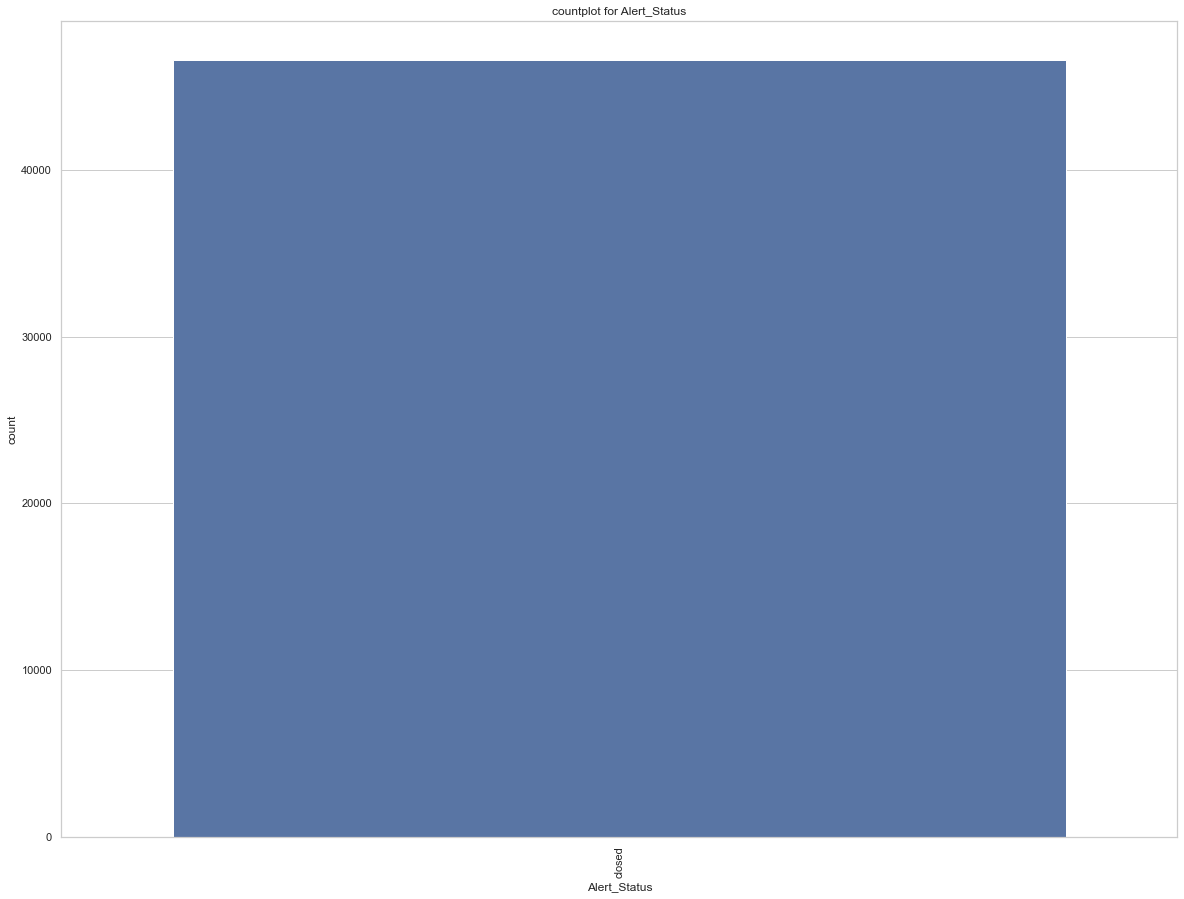

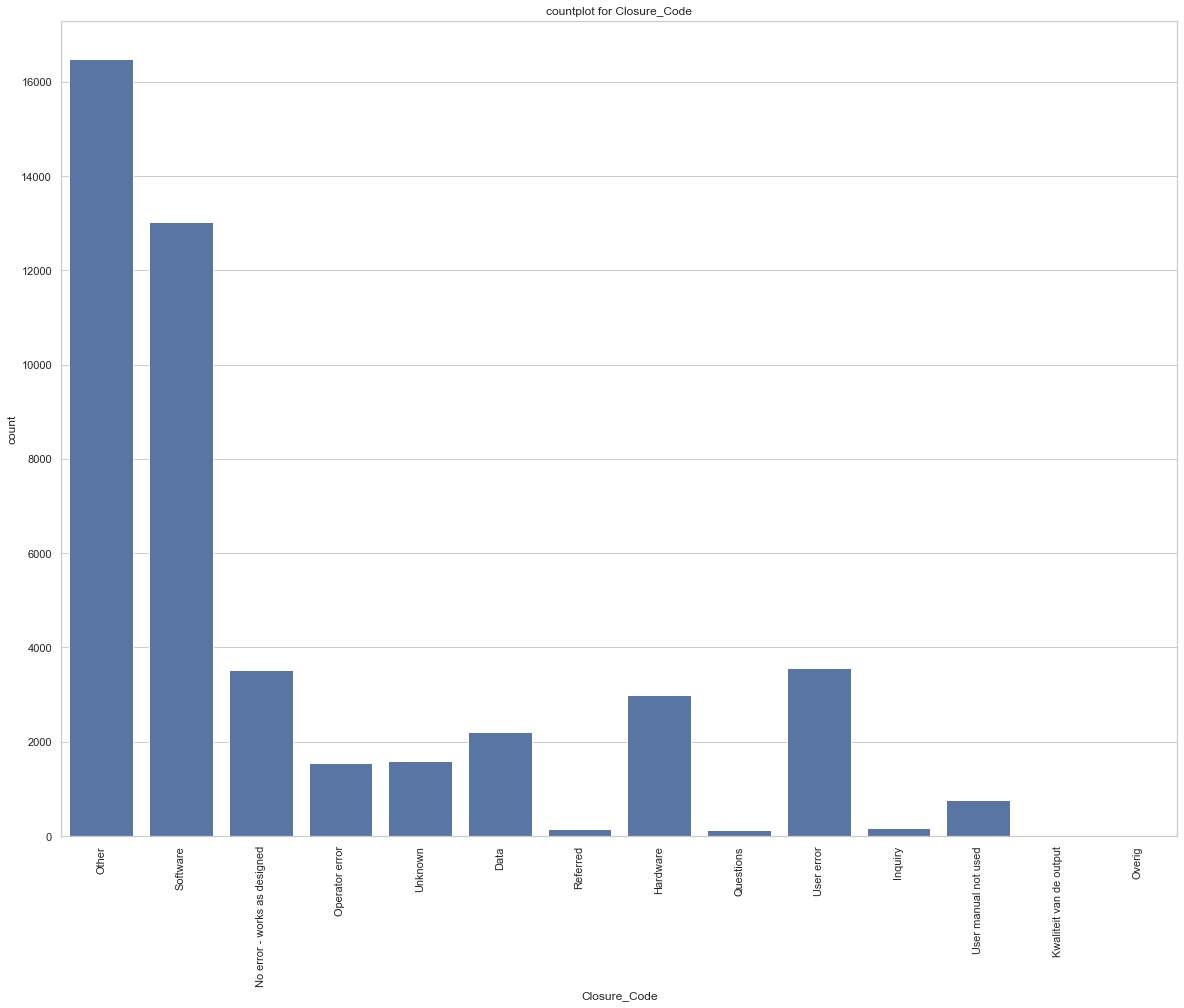

In [303]:
# plt.figure(figsize=(20,15))

for col in col_without:
    plt.figure(figsize=(20,15))
    sns.countplot(x=df[col])
    plt.title(f'countplot for {col}')
    plt.xticks(rotation="vertical")
    plt.show()
    

Impact, Urgency

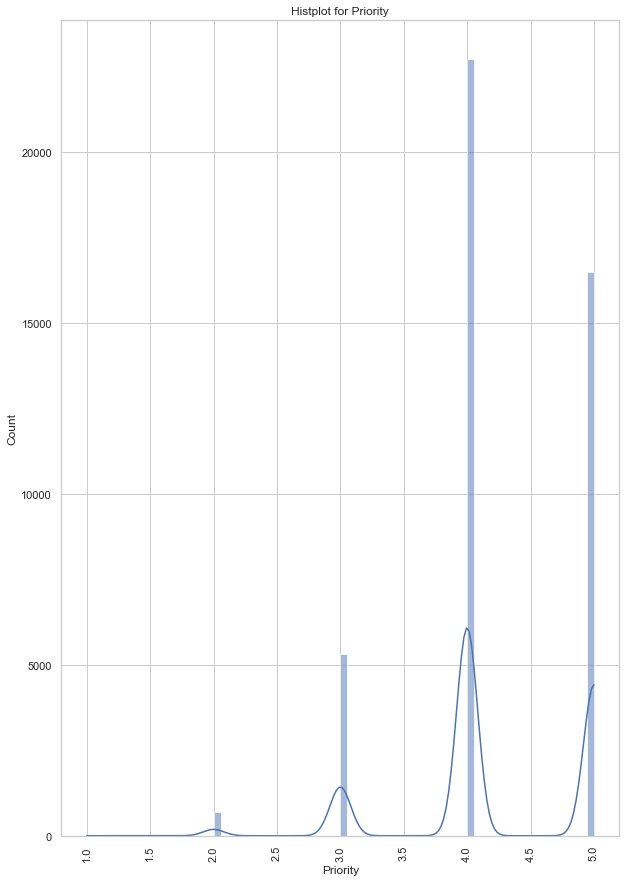

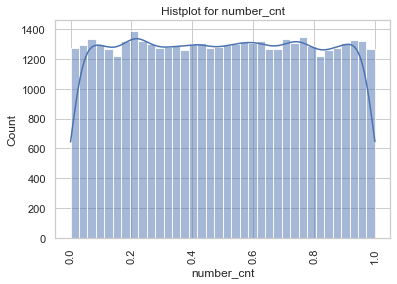

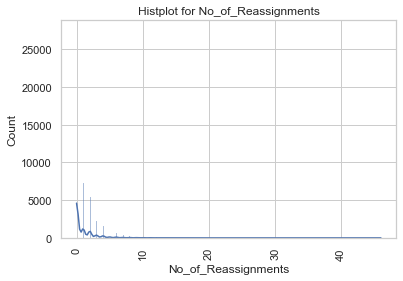

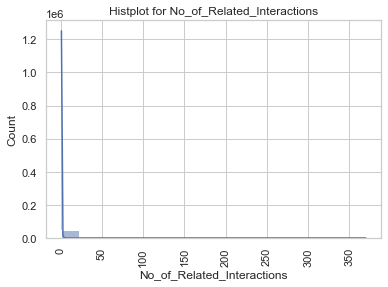

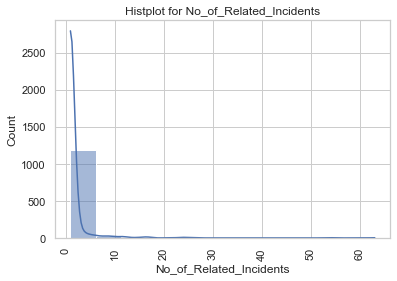

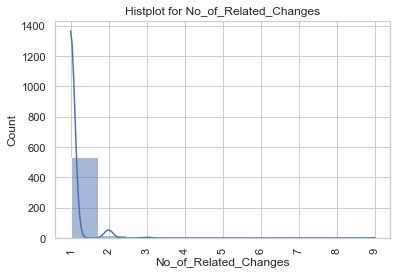

In [304]:
plt.figure(figsize=(10,15))

for col in numerical_data:
    sns.histplot(x=df[col],kde=True)
    plt.title(f'Histplot for {col}')
    plt.xticks(rotation="vertical")
    plt.show()

### Data Preprocessing

In [305]:
missing_values = df.isna().sum()/len(df.index)*100
missing_values

CI_Name                        0.000000
CI_Cat                         0.238167
CI_Subcat                      0.238167
WBS                            0.000000
Incident_ID                    0.000000
Status                         0.000000
Impact                         0.000000
Urgency                        0.000000
Priority                       2.960992
number_cnt                     0.000000
Category                       0.000000
KB_number                      0.000000
Alert_Status                   0.000000
No_of_Reassignments            0.002146
Open_Time                      0.000000
Reopen_Time                   95.099343
Resolved_Time                  3.819251
Close_Time                     0.000000
Handle_Time_hrs                0.002146
Closure_Code                   0.986997
No_of_Related_Interactions     0.244604
Related_Interaction            0.000000
No_of_Related_Incidents       97.378020
No_of_Related_Changes         98.798438
Related_Change                98.798438


In [306]:
columns_to_drop = missing_values[missing_values > 90].index

In [307]:
df.drop(columns=columns_to_drop, inplace=True)


In [308]:
df.isnull().sum()


CI_Name                          0
CI_Cat                         111
CI_Subcat                      111
WBS                              0
Incident_ID                      0
Status                           0
Impact                           0
Urgency                          0
Priority                      1380
number_cnt                       0
Category                         0
KB_number                        0
Alert_Status                     0
No_of_Reassignments              1
Open_Time                        0
Resolved_Time                 1780
Close_Time                       0
Handle_Time_hrs                  1
Closure_Code                   460
No_of_Related_Interactions     114
Related_Interaction              0
dtype: int64

In [309]:
df.Priority.unique()

array([ 4.,  3., nan,  5.,  2.,  1.])

In [310]:
X = df.drop('Priority',axis=1)

In [311]:
%matplotlib inline

In [312]:
numerical_data = list(X.select_dtypes(exclude='O').columns)
categorical_data = list(X.select_dtypes(include='O').columns)


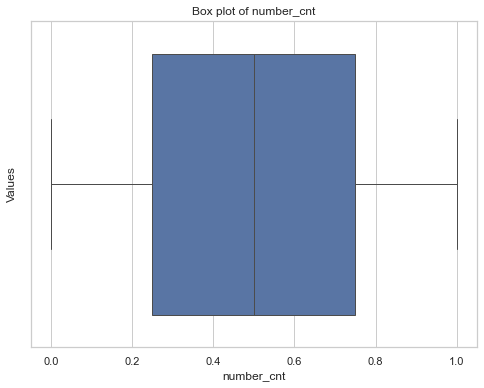

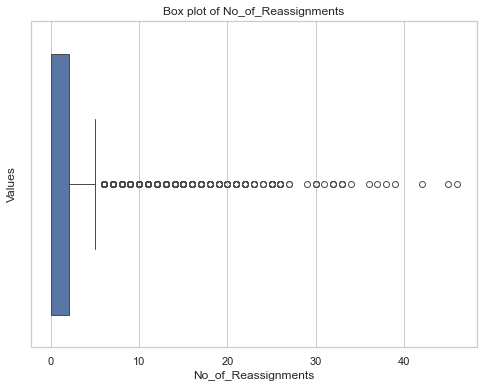

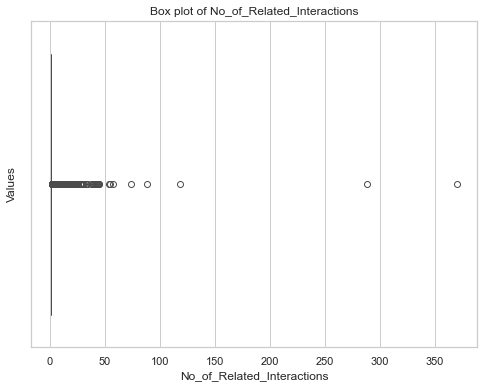

In [313]:
for column in numerical_data:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.ylabel('Values')
    plt.show()


In [314]:
for col in numerical_data:
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR

    df.loc[df[col] > upper_limit, col] = df[col].median()
    df.loc[df[col] < lower_limit, col] = df[col].median()

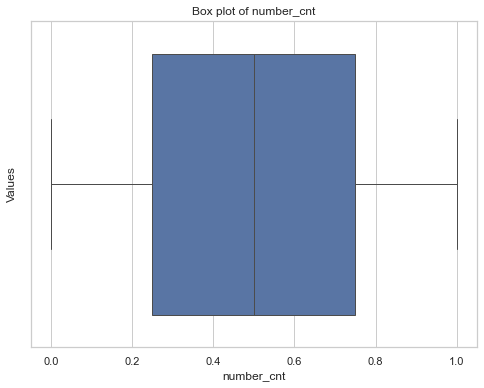

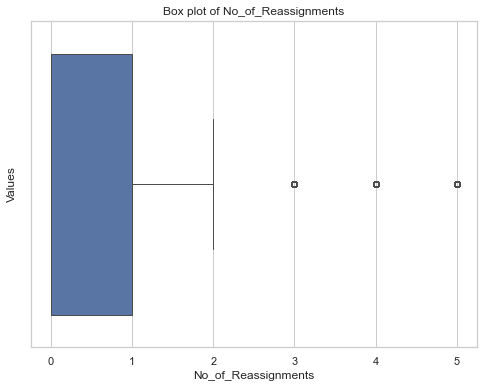

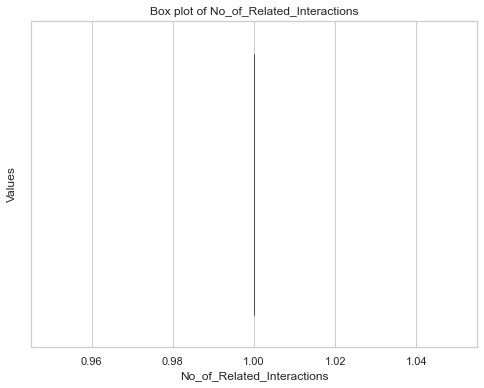

In [315]:
for column in numerical_data:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.ylabel('Values')
    plt.show()


In [316]:
df.loc[df['No_of_Related_Interactions'] > upper_limit]


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction


In [317]:
df.loc[df['No_of_Related_Interactions'] < lower_limit]

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction


### Encoding Technique


In [318]:
categorical_data=df.select_dtypes(include='O').columns

In [319]:
len(categorical_data)

17

In [320]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,0.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,0.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029


In [321]:
df.drop(columns=['CI_Name','WBS','Incident_ID','KB_number','Related_Interaction','Handle_Time_hrs'],axis=1,inplace=True)

In [322]:
df.isna().sum()/len(df.index)*100

CI_Cat                        0.238167
CI_Subcat                     0.238167
Status                        0.000000
Impact                        0.000000
Urgency                       0.000000
Priority                      2.960992
number_cnt                    0.000000
Category                      0.000000
Alert_Status                  0.000000
No_of_Reassignments           0.002146
Open_Time                     0.000000
Resolved_Time                 3.819251
Close_Time                    0.000000
Closure_Code                  0.986997
No_of_Related_Interactions    0.244604
dtype: float64

In [323]:
df['Impact'].value_counts()

Impact
4     22556
5     16741
3      5234
NS     1380
2       692
1         3
Name: count, dtype: int64

In [324]:
df.drop(df.loc[df['Impact']=='NS'].index,inplace=True)

In [325]:
df['Impact'].value_counts()

Impact
4    22556
5    16741
3     5234
2      692
1        3
Name: count, dtype: int64

In [326]:
df['Urgency'].value_counts()

Urgency
4               15506
5               12284
4                7050
5                4495
3                3507
3                1681
2                 538
2                 158
1                   5
1                   1
5 - Very Low        1
Name: count, dtype: int64

In [327]:
df.loc[df['Urgency'] == '5 - Very Low', 'Urgency'] = '5'

In [328]:
df['Urgency'].value_counts()

Urgency
4    15506
5    12284
4     7050
5     4496
3     3507
3     1681
2      538
2      158
1        5
1        1
Name: count, dtype: int64

In [329]:
df['Urgency'] = df['Urgency'].astype('int')

In [330]:
df['Urgency'].value_counts()


Urgency
4    22556
5    16780
3     5188
2      696
1        6
Name: count, dtype: int64

In [331]:
df

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions
0,subapplication,Web Based Application,Closed,4,4,4.0,0.601292,incident,closed,0.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,Other,1.0
1,application,Web Based Application,Closed,3,3,3.0,0.415050,incident,closed,0.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,Software,1.0
3,application,Web Based Application,Closed,4,4,4.0,0.642927,incident,closed,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,Operator error,1.0
4,application,Web Based Application,Closed,4,4,4.0,0.345258,incident,closed,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,Other,1.0
5,application,Web Based Application,Closed,4,4,4.0,0.006676,incident,closed,4.0,10-08-2012 11:27,08-11-2013 13:54,08-11-2013 13:54,Other,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,application,Server Based Application,Closed,4,4,4.0,0.231896,incident,closed,0.0,31-03-2014 16:23,31-03-2014 16:29,31-03-2014 16:29,Other,1.0
46602,application,Server Based Application,Closed,4,4,4.0,0.805153,incident,closed,0.0,31-03-2014 15:03,31-03-2014 15:29,31-03-2014 15:29,User error,1.0
46603,computer,Laptop,Closed,5,5,5.0,0.917466,incident,closed,0.0,31-03-2014 15:28,31-03-2014 15:32,31-03-2014 15:32,Hardware,1.0
46604,application,Web Based Application,Closed,4,4,4.0,0.701278,incident,closed,0.0,31-03-2014 15:35,31-03-2014 15:42,31-03-2014 15:42,Software,1.0


In [332]:
df.Priority.unique()

array([4., 3., 5., 2., 1.])

In [333]:
df.Impact.unique()


array(['4', '3', '5', '2', '1'], dtype=object)

In [334]:
df['Impact'] = df['Impact'].astype('int')

In [335]:
imputer = SimpleImputer(strategy='median')

In [336]:
num_cols_df = df.select_dtypes(exclude="O")

In [337]:
# for col in numerical_data:
imputer.fit_transform(num_cols_df)

array([[4.        , 4.        , 4.        , 0.60129228, 0.        ,
        1.        ],
       [3.        , 3.        , 3.        , 0.41504997, 0.        ,
        1.        ],
       [4.        , 4.        , 4.        , 0.64292722, 0.        ,
        1.        ],
       ...,
       [5.        , 5.        , 5.        , 0.91746629, 0.        ,
        1.        ],
       [4.        , 4.        , 4.        , 0.70127816, 0.        ,
        1.        ],
       [3.        , 3.        , 3.        , 0.90231951, 0.        ,
        1.        ]])

In [338]:
num_df = pd.DataFrame(data=imputer.fit_transform(num_cols_df),columns=df.select_dtypes(exclude="O").columns)

In [339]:
num_df

,Impact,Urgency,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions
0,4.0,4.0,4.0,0.601292,0.0,1.0
1,3.0,3.0,3.0,0.415050,0.0,1.0
2,4.0,4.0,4.0,0.642927,0.0,1.0
3,4.0,4.0,4.0,0.345258,2.0,1.0
4,4.0,4.0,4.0,0.006676,4.0,1.0
...,...,...,...,...,...,...
45221,4.0,4.0,4.0,0.231896,0.0,1.0
45222,4.0,4.0,4.0,0.805153,0.0,1.0
45223,5.0,5.0,5.0,0.917466,0.0,1.0
45224,4.0,4.0,4.0,0.701278,0.0,1.0


In [340]:
num_df['Priority'] = num_df['Priority'].astype('int')

In [341]:
cat_col_df = df.select_dtypes(include="O")

In [342]:
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit_transform(cat_col_df)


array([['subapplication', 'Web Based Application', 'Closed', ...,
        '04-11-2013 13:50', '04-11-2013 13:51', 'Other'],
       ['application', 'Web Based Application', 'Closed', ...,
        '02-12-2013 12:36', '02-12-2013 12:36', 'Software'],
       ['application', 'Web Based Application', 'Closed', ...,
        '14-11-2013 09:31', '14-11-2013 09:31', 'Operator error'],
       ...,
       ['computer', 'Laptop', 'Closed', ..., '31-03-2014 15:32',
        '31-03-2014 15:32', 'Hardware'],
       ['application', 'Web Based Application', 'Closed', ...,
        '31-03-2014 15:42', '31-03-2014 15:42', 'Software'],
       ['hardware', 'DataCenterEquipment', 'Closed', ...,
        '31-03-2014 22:47', '31-03-2014 22:47', 'Hardware']], dtype=object)

In [343]:
cat_df = pd.DataFrame(data=imputer_cat.fit_transform(cat_col_df),columns=df.select_dtypes(include="O").columns)


In [344]:
cat_df

,CI_Cat,CI_Subcat,Status,Category,Alert_Status,Open_Time,Resolved_Time,Close_Time,Closure_Code
0,subapplication,Web Based Application,Closed,incident,closed,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,Other
1,application,Web Based Application,Closed,incident,closed,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,Software
2,application,Web Based Application,Closed,incident,closed,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,Operator error
3,application,Web Based Application,Closed,incident,closed,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,Other
4,application,Web Based Application,Closed,incident,closed,10-08-2012 11:27,08-11-2013 13:54,08-11-2013 13:54,Other
...,...,...,...,...,...,...,...,...,...
45221,application,Server Based Application,Closed,incident,closed,31-03-2014 16:23,31-03-2014 16:29,31-03-2014 16:29,Other
45222,application,Server Based Application,Closed,incident,closed,31-03-2014 15:03,31-03-2014 15:29,31-03-2014 15:29,User error
45223,computer,Laptop,Closed,incident,closed,31-03-2014 15:28,31-03-2014 15:32,31-03-2014 15:32,Hardware
45224,application,Web Based Application,Closed,incident,closed,31-03-2014 15:35,31-03-2014 15:42,31-03-2014 15:42,Software


In [345]:
new_df=pd.concat([cat_df,num_df],axis=1)
new_df

,CI_Cat,CI_Subcat,Status,Category,Alert_Status,Open_Time,Resolved_Time,Close_Time,Closure_Code,Impact,Urgency,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions
0,subapplication,Web Based Application,Closed,incident,closed,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,Other,4.0,4.0,4,0.601292,0.0,1.0
1,application,Web Based Application,Closed,incident,closed,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,Software,3.0,3.0,3,0.415050,0.0,1.0
2,application,Web Based Application,Closed,incident,closed,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,Operator error,4.0,4.0,4,0.642927,0.0,1.0
3,application,Web Based Application,Closed,incident,closed,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,Other,4.0,4.0,4,0.345258,2.0,1.0
4,application,Web Based Application,Closed,incident,closed,10-08-2012 11:27,08-11-2013 13:54,08-11-2013 13:54,Other,4.0,4.0,4,0.006676,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45221,application,Server Based Application,Closed,incident,closed,31-03-2014 16:23,31-03-2014 16:29,31-03-2014 16:29,Other,4.0,4.0,4,0.231896,0.0,1.0
45222,application,Server Based Application,Closed,incident,closed,31-03-2014 15:03,31-03-2014 15:29,31-03-2014 15:29,User error,4.0,4.0,4,0.805153,0.0,1.0
45223,computer,Laptop,Closed,incident,closed,31-03-2014 15:28,31-03-2014 15:32,31-03-2014 15:32,Hardware,5.0,5.0,5,0.917466,0.0,1.0
45224,application,Web Based Application,Closed,incident,closed,31-03-2014 15:35,31-03-2014 15:42,31-03-2014 15:42,Software,4.0,4.0,4,0.701278,0.0,1.0


In [346]:
new_df.drop(['Alert_Status'],axis=1,inplace=True) # all values are same

In [347]:
# SEPERATE : Status binary variable


In [348]:
list(cat_df.columns)

['CI_Cat',
 'CI_Subcat',
 'Status',
 'Category',
 'Alert_Status',
 'Open_Time',
 'Resolved_Time',
 'Close_Time',
 'Closure_Code']

In [349]:
# new_df['Open_Time'] = pd.to_datetime(new_df['Open_Time'],format='%d-%m-%Y-%H-%M')

In [350]:
new_df.CI_Cat.value_counts()

CI_Cat
application             31985
subapplication           7720
computer                 3544
storage                   653
hardware                  406
software                  294
displaydevice             212
database                  168
officeelectronics         139
networkcomponents          99
applicationcomponent        4
Phone                       2
Name: count, dtype: int64

In [351]:
new_df.select_dtypes(exclude='O').columns

Index(['Impact', 'Urgency', 'Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions'],
      dtype='object')

In [352]:
label_map = {}
for column in cat_df.drop(['Status','Open_Time','Resolved_Time','Close_Time'],axis=1):
    value_counts = cat_df[column].value_counts()
    label_map[column] = {value: idx for idx, value in enumerate(value_counts.index)}
print(label_map)


{'CI_Cat': {'application': 0, 'subapplication': 1, 'computer': 2, 'storage': 3, 'hardware': 4, 'software': 5, 'displaydevice': 6, 'database': 7, 'officeelectronics': 8, 'networkcomponents': 9, 'applicationcomponent': 10, 'Phone': 11}, 'CI_Subcat': {'Server Based Application': 0, 'Web Based Application': 1, 'Desktop Application': 2, 'Laptop': 3, 'SAP': 4, 'Banking Device': 5, 'Citrix': 6, 'SAN': 7, 'Client Based Application': 8, 'Desktop': 9, 'DataCenterEquipment': 10, 'System Software': 11, 'Monitor': 12, 'Database': 13, 'Windows Server': 14, 'Exchange': 15, 'Controller': 16, 'Printer': 17, 'Omgeving': 18, 'Standard Application': 19, 'MigratieDummy': 20, 'Automation Software': 21, 'Scanner': 22, 'Linux Server': 23, 'Encryption': 24, 'KVM Switches': 25, 'Network Component': 26, 'Keyboard': 27, 'Switch': 28, 'Router': 29, 'Lines': 30, 'zOS Cluster': 31, 'Net Device': 32, 'SharePoint Farm': 33, 'NonStop Server': 34, 'VDI': 35, 'X86 Server': 36, 'ESX Cluster': 37, 'Thin Client': 38, 'Unix 

In [353]:
# manually encoding columns

# new_df['Impact'] = new_df['Impact'].map({'High':1, 'Medium':2, 'Low':3}
for col in cat_df.drop(['Status','Open_Time','Resolved_Time','Close_Time'],axis=1):
        cat_df[col]=cat_df[col].map(label_map[col])


In [354]:
cat_df.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Category', 'Alert_Status',
       'Open_Time', 'Resolved_Time', 'Close_Time', 'Closure_Code'],
      dtype='object')

In [355]:
new_df.drop(['CI_Cat', 'CI_Subcat', 'Status', 'Category', 
       'Open_Time', 'Resolved_Time', 'Close_Time', 'Closure_Code'],axis=1,inplace=True)

In [356]:
new_df.columns

Index(['Impact', 'Urgency', 'Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions'],
      dtype='object')

In [357]:
new_df1=pd.concat([new_df,cat_df],axis=1)

In [358]:
new_df1.columns

Index(['Impact', 'Urgency', 'Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions', 'CI_Cat', 'CI_Subcat', 'Status',
       'Category', 'Alert_Status', 'Open_Time', 'Resolved_Time', 'Close_Time',
       'Closure_Code'],
      dtype='object')

In [359]:
new_df1.head()

,Impact,Urgency,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,CI_Cat,CI_Subcat,Status,Category,Alert_Status,Open_Time,Resolved_Time,Close_Time,Closure_Code
0,4.0,4.0,4,0.601292,0.0,1.0,1,1,Closed,0,0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,0
1,3.0,3.0,3,0.415050,0.0,1.0,0,1,Closed,0,0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,1
2,4.0,4.0,4,0.642927,0.0,1.0,0,1,Closed,0,0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,7
3,4.0,4.0,4,0.345258,2.0,1.0,0,1,Closed,0,0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,0
4,4.0,4.0,4,0.006676,4.0,1.0,0,1,Closed,0,0,10-08-2012 11:27,08-11-2013 13:54,08-11-2013 13:54,0


In [360]:
new_df1.Status.value_counts()

Status
Closed              45218
Work in progress        8
Name: count, dtype: int64

In [361]:
new_df1['Status'] = new_df1['Status'].map({'Closed':1, 'Work in progress':2})

In [362]:
new_df1.head()

,Impact,Urgency,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,CI_Cat,CI_Subcat,Status,Category,Alert_Status,Open_Time,Resolved_Time,Close_Time,Closure_Code
0,4.0,4.0,4,0.601292,0.0,1.0,1,1,1,0,0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,0
1,3.0,3.0,3,0.415050,0.0,1.0,0,1,1,0,0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,1
2,4.0,4.0,4,0.642927,0.0,1.0,0,1,1,0,0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,7
3,4.0,4.0,4,0.345258,2.0,1.0,0,1,1,0,0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,0
4,4.0,4.0,4,0.006676,4.0,1.0,0,1,1,0,0,10-08-2012 11:27,08-11-2013 13:54,08-11-2013 13:54,0


In [363]:
# new_df1[['Open_Time','Resolved_Time','Close_Time']]=pd.to_datetime(new_df1[['Open_Time','Resolved_Time','Close_Time']],format='%d-%m-%Y %H:%M')

In [364]:
# pd.to_datetime(new_df1['Open_Time'],format='%d-%m-%Y %H:%M')

In [365]:
# new_df1['Open_Time']=pd.to_datetime(new_df1['Open_Time'],format='%d-%m-%Y %H:%M')

In [366]:
# doing the same in loop
for i in ['Open_Time','Close_Time','Resolved_Time']:
          new_df1[i]=pd.to_datetime(new_df1[i],format='%d-%m-%Y %H:%M')

In [367]:
df_task_1 = new_df1.drop(['Open_Time','Resolved_Time','Close_Time','No_of_Related_Interactions','Alert_Status'],axis=1)

In [368]:
#  Dropping the constant values No_of_Related_Interactions,Alert_Status

In [369]:
df_task_1.head()

,Impact,Urgency,Priority,number_cnt,No_of_Reassignments,CI_Cat,CI_Subcat,Status,Category,Closure_Code
0,4.0,4.0,4,0.601292,0.0,1,1,1,0,0
1,3.0,3.0,3,0.415050,0.0,0,1,1,0,1
2,4.0,4.0,4,0.642927,0.0,0,1,1,0,7
3,4.0,4.0,4,0.345258,2.0,0,1,1,0,0
4,4.0,4.0,4,0.006676,4.0,0,1,1,0,0


In [370]:
df_task_1.astype('float')

,Impact,Urgency,Priority,number_cnt,No_of_Reassignments,CI_Cat,CI_Subcat,Status,Category,Closure_Code
0,4.0,4.0,4.0,0.601292,0.0,1.0,1.0,1.0,0.0,0.0
1,3.0,3.0,3.0,0.415050,0.0,0.0,1.0,1.0,0.0,1.0
2,4.0,4.0,4.0,0.642927,0.0,0.0,1.0,1.0,0.0,7.0
3,4.0,4.0,4.0,0.345258,2.0,0.0,1.0,1.0,0.0,0.0
4,4.0,4.0,4.0,0.006676,4.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
45221,4.0,4.0,4.0,0.231896,0.0,0.0,0.0,1.0,0.0,0.0
45222,4.0,4.0,4.0,0.805153,0.0,0.0,0.0,1.0,0.0,3.0
45223,5.0,5.0,5.0,0.917466,0.0,2.0,3.0,1.0,0.0,4.0
45224,4.0,4.0,4.0,0.701278,0.0,0.0,1.0,1.0,0.0,1.0


In [371]:
df_task_1 = df_task_1[df_task_1['Priority']!=1]

<Axes: >

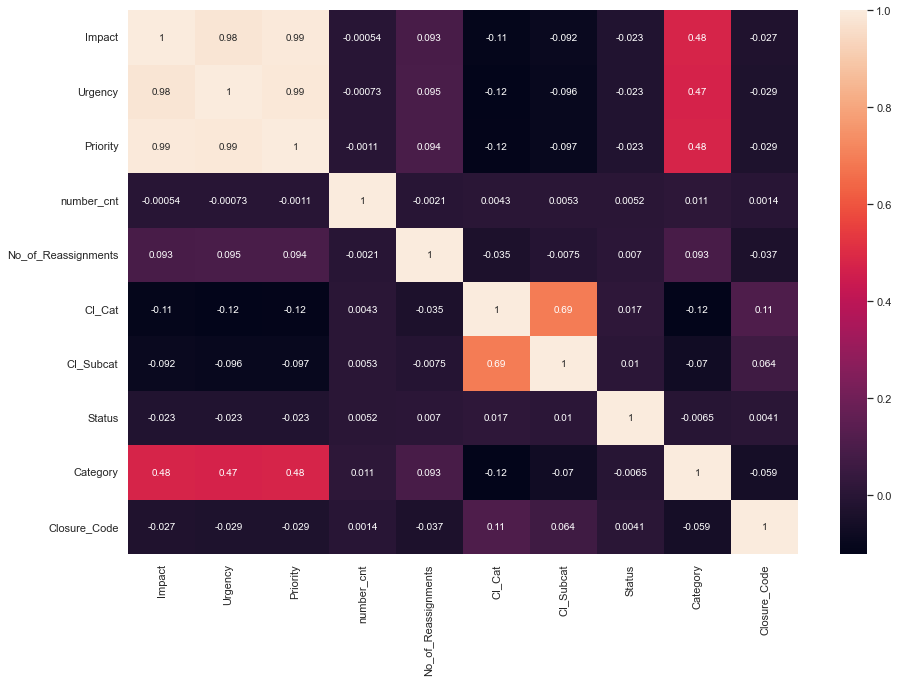

In [372]:
plt.figure(figsize=(15,10))
sns.heatmap(df_task_1.corr(),annot=True)

In [373]:
# df_task_1.drop(['Urgency','Impact'],axis=1,inplace=True)

In [374]:
df_task_1['Priority'].value_counts()

Priority
4    22717
5    16486
3     5323
2      697
Name: count, dtype: int64

Dataset is imbalanced. but checking the model performance

In [375]:
X = df_task_1.drop('Priority',axis=1)
y = df_task_1['Priority']

In [376]:
y.unique()

array([4, 3, 5, 2])

In [377]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true,predicted)
    f1 = f1_score(true,predicted,average='weighted')
    precision = precision_score(true,predicted,average='weighted')
    recall = recall_score(true,predicted,average='weighted')
    
    return accuracy,f1,precision, recall

In [378]:
params={
        "Decision Tree": {
            'criterion':["gini", "entropy", "log_loss"],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        },
        "Random Forest":{
            'criterion':["gini", "entropy", "log_loss"],
            'n_estimators': [50, 100, 200], 
            'max_depth': [None, 10, 20, 30], 
            'min_samples_split': [2, 5, 10]
        },
        "Logistic Regression":{
            'C': [0.001, 0.01, 0.1, 1, 10, 100], 
            'penalty': ['l1', 'l2']
        },
        "KNN":{
            'n_neighbors': [3, 5, 7, 9], 
            'weights': ['uniform', 'distance'],
            'algorithm':['ball_tree','kd_tree','brute']
        },
        "XGBClassifier":{
            'learning_rate':[.1,.01,.05,.001],
            'n_estimators': [8,16,32,64,128,256]
        },
        "CatBoostClassifier":{
            'iterations': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'depth': [4, 6, 8]
        },
        "AdaBoost":{
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        },
        "LightGBMClassifier":{
            'n_estimators': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'max_depth': [3, 5, 7]
           },
        "MLPClassifier" : {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'alpha': [0.0001, 0.001, 0.01]
        }

}


Balancing the data and scaling it is essential


In [379]:
scaled_model = MinMaxScaler()

x_scaled = scaled_model.fit_transform(X)

x_scaled_df = pd.DataFrame(x_scaled, columns=X.columns)

In [380]:
x_scaled_df.shape

(45223, 9)

In [381]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled_df,y,random_state=42,stratify=y)

# Display the class distribution in the training and testing sets
print("Class distribution in training set:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Class distribution in testing set:", dict(zip(*np.unique(y_test, return_counts=True))))

Class distribution in training set: {2: 523, 3: 3992, 4: 17038, 5: 12364}
Class distribution in testing set: {2: 174, 3: 1331, 4: 5679, 5: 4122}


In [382]:
rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(x_train, y_train)

print('Original dataset shape %s' % Counter(y))
print('Undersampled dataset shape %s' % Counter(y_undersampled))
# ------------------------------------------------------------------------------------------------



Original dataset shape Counter({4: 22717, 5: 16486, 3: 5323, 2: 697})
Undersampled dataset shape Counter({2: 523, 3: 523, 4: 523, 5: 523})


In [383]:
model_results = {}

class_mapping = {label: idx for idx, label in enumerate(np.unique(y_undersampled))}
y_undersampled_mapped = np.vectorize(class_mapping.get)(y_undersampled)

class_mapping = {label: idx for idx, label in enumerate(np.unique(y_test))}
y_test_mapped = np.vectorize(class_mapping.get)(y_test)

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

def run_model(model_name, model):
    '''
    Function to run the model and return the results
    '''

    model.fit(X_undersampled, y_undersampled_mapped)  # Train model

    # Make predictions
    y_undersampled_pred = model.predict(X_undersampled)
    y_test_pred = model.predict(x_test)

    # Map class labels for test set if needed
    y_test_mapped = np.vectorize(class_mapping.get)(y_test)

    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_f1, model_train_precision, model_train_recall = evaluate_model(
        y_undersampled_mapped, y_undersampled_pred)
    model_test_accuracy, model_test_f1, model_test_precision, model_test_recall = evaluate_model(
        y_test_mapped, y_test_pred)

    cross_val_mean = cross_val_score(model,
                                     X_undersampled,
                                     y_undersampled_mapped,
                                     cv=cv,
                                     scoring='f1_weighted').mean()
    cross_val_std = cross_val_score(model,
                                    X_undersampled,
                                    y_undersampled_mapped,
                                    cv=cv,
                                    scoring='f1_weighted').std()

    print(model_name)

    print('Model performance for Training set')
    print("- Accuracy : {:.4f}".format(model_train_accuracy))
    print("- F1_score : {:.4f}".format(model_train_f1))
    print("- Precision Score: {:.4f}".format(model_train_precision))
    print("- Recall Score: {:.4f}".format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1_score: {:.4f}".format(model_test_f1))
    print("- Precision Score: {:.4f}".format(model_test_precision))
    print("- Recall Score: {:.4f}".format(model_test_recall))

    print('----------------------------------')

    print("Crossvalidate Score(mean): {:.4f}".format(cross_val_mean))
    print("Crossvalidate Std: {:.4f}".format(cross_val_std))

    model_results[model_name] = {
        'accuracy_undersampled': model_train_accuracy,
        'accuracy_test': model_test_accuracy,
        'f1_train': model_train_f1,
        'f1_test': model_test_f1
    }

    print('=' * 35)


#     print('\n')

In [384]:
def hyper_tuning(model_name,model):
        '''
        Function to do hyperparameter tuning
        '''
        para = params[model_name]

        gs = RandomizedSearchCV(model,para,cv=cv,scoring='f1_weighted',n_jobs=-1)
        gs.fit(X_undersampled,y_undersampled_mapped)
        
        model.set_params(**gs.best_params_)
        run_model(model_name,model)
        

In [385]:
run_model('Logistic Regression',LogisticRegression())

Logistic Regression
Model performance for Training set
- Accuracy : 0.9924
- F1_score : 0.9924
- Precision Score: 0.9924
- Recall Score: 0.9924
----------------------------------
Model performance for Test set
- Accuracy: 0.9917
- F1_score: 0.9917
- Precision Score: 0.9918
- Recall Score: 0.9917
----------------------------------
Crossvalidate Score(mean): 0.9919
Crossvalidate Std: 0.0014


In [386]:
run_model('KNN',KNeighborsClassifier())

KNN
Model performance for Training set
- Accuracy : 0.9938
- F1_score : 0.9938
- Precision Score: 0.9938
- Recall Score: 0.9938
----------------------------------
Model performance for Test set
- Accuracy: 0.9904
- F1_score: 0.9904
- Precision Score: 0.9905
- Recall Score: 0.9904
----------------------------------
Crossvalidate Score(mean): 0.9919
Crossvalidate Std: 0.0024


In [387]:
run_model('Random Forest',RandomForestClassifier())

Random Forest
Model performance for Training set
- Accuracy : 1.0000
- F1_score : 1.0000
- Precision Score: 1.0000
- Recall Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9996
- F1_score: 0.9996
- Precision Score: 0.9996
- Recall Score: 0.9996
----------------------------------
Crossvalidate Score(mean): 0.9981
Crossvalidate Std: 0.0000


In [388]:
hyper_tuning('Decision Tree',DecisionTreeClassifier(random_state=42))

Decision Tree
Model performance for Training set
- Accuracy : 1.0000
- F1_score : 1.0000
- Precision Score: 1.0000
- Recall Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9996
- F1_score: 0.9996
- Precision Score: 0.9996
- Recall Score: 0.9996
----------------------------------
Crossvalidate Score(mean): 0.9986
Crossvalidate Std: 0.0014


In [389]:
run_model('XGBClassifier',XGBClassifier())

XGBClassifier
Model performance for Training set
- Accuracy : 1.0000
- F1_score : 1.0000
- Precision Score: 1.0000
- Recall Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9996
- F1_score: 0.9996
- Precision Score: 0.9996
- Recall Score: 0.9996
----------------------------------
Crossvalidate Score(mean): 0.9967
Crossvalidate Std: 0.0005


In [390]:
run_model('LightGBMClassifier',LGBMClassifier())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 8
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [391]:
run_model('SVC',SVC())


SVC
Model performance for Training set
- Accuracy : 0.9967
- F1_score : 0.9967
- Precision Score: 0.9967
- Recall Score: 0.9967
----------------------------------
Model performance for Test set
- Accuracy: 0.9946
- F1_score: 0.9946
- Precision Score: 0.9947
- Recall Score: 0.9946
----------------------------------
Crossvalidate Score(mean): 0.9924
Crossvalidate Std: 0.0010


### Insights:

- The data is heavily imbalanced. There are 5 classes with 1 with only 3 rows. With those 3 rows also, even after oversampling and undersampling, the models were overfitting. We also tried only balancing the training data and entire dataset. Still it didn't work.
- So we removed only class 1 and created the model for the rest of the 4 classes. Balancing was done using undersampling training data as it is yielding best results for the models.

Forecasting using Time series

In [392]:
import datetime as dt

In [393]:
df_forecast = pd.read_csv('ABCtech.csv')

In [394]:
# Imporing the necessary columns
incfrq = df_forecast.loc[:,['Incident_ID','Open_Time']]
incfrq

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01
...,...,...
46601,IM0047053,31-03-2014 16:23
46602,IM0047054,31-03-2014 15:03
46603,IM0047055,31-03-2014 15:28
46604,IM0047056,31-03-2014 15:35


In [395]:
incfrq['Open_Time'] = pd.to_datetime(incfrq['Open_Time'], format='%d-%m-%Y %H:%M')

In [396]:
incfrq['Open_Time'] = incfrq['Open_Time'].dt.date

In [397]:
incfrq.head()

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10


In [398]:
incfrq['No_Incidents'] = incfrq.groupby('Open_Time')['Incident_ID'].transform('count')

In [399]:
incfrq.drop('Incident_ID',axis=1,inplace=True)
incfrq.drop_duplicates(inplace=True)
incfrq

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1
3,2012-07-17,1
4,2012-08-10,2
6,2012-08-15,1
7,2012-08-22,1
8,2012-08-29,1
9,2012-09-03,1
10,2012-09-21,1


In [400]:
incfrq = incfrq.set_index('Open_Time')
incfrq.index = pd.to_datetime(incfrq.index)
incfrq.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [401]:
# Checking range of dates for our values
print(incfrq.index.min(),'to',incfrq.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


In [402]:
# Making a new Series with frequency as Day
data1 = incfrq['No_Incidents']
data1 = data1.asfreq('D')
data1.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

<Axes: xlabel='Open_Time'>

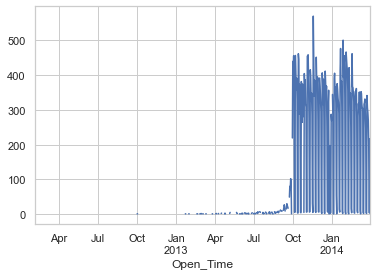

In [403]:
data1.plot()

Before 2013, the data is quite less, so dropping those values

In [404]:
# Since not many tickets before October 2013, we consider only the latter values
incfrom2013 = incfrq[incfrq.index > dt.datetime(2013,10,1)]

In [405]:
# new Series
data2 = incfrom2013['No_Incidents']
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

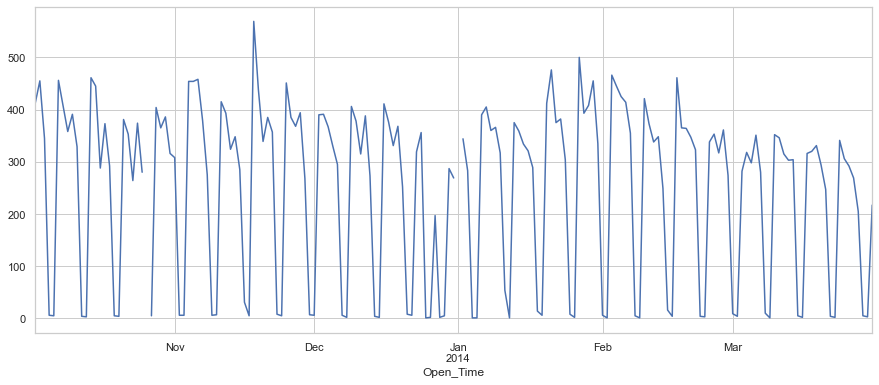

In [406]:
# Plotting number of tickets per day after October 2013
data2.plot(figsize=(15,6))
plt.show()

In [407]:
# Making a list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [408]:
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data2,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6180293605685
ARIMA(0, 0, 1) - AIC:2373.785382472276
ARIMA(0, 1, 0) - AIC:2371.128960804689


ARIMA(0, 1, 1) - AIC:2313.1363338230985
ARIMA(1, 0, 0) - AIC:2365.291646936565
ARIMA(1, 0, 1) - AIC:2337.312508693354
ARIMA(1, 1, 0) - AIC:2373.128068065154
ARIMA(1, 1, 1) - AIC:2294.4315812436344


In [409]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(data2,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.771      0.000       0.163       0.515
ma.L1         -0.9989      0.428     -2.332      0.020      -1.839      -0.159
sigma2       2.52e+04   9781.685      2.576      0.010    6023.606    4.44e+04


In [410]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2014-03-03    172.0
2014-03-04    266.0
2014-03-05    279.0
2014-03-06    272.0
2014-03-07    291.0
2014-03-08    267.0
2014-03-09    174.0
2014-03-10    169.0
2014-03-11    289.0
2014-03-12    288.0
2014-03-13    277.0
2014-03-14    273.0
2014-03-15    274.0
2014-03-16    171.0
2014-03-17    169.0
2014-03-18    276.0
2014-03-19    278.0
2014-03-20    282.0
2014-03-21    269.0
2014-03-22    253.0
2014-03-23    170.0
2014-03-24    168.0
2014-03-25    284.0
2014-03-26    272.0
2014-03-27    267.0
2014-03-28    260.0
2014-03-29    238.0
2014-03-30    169.0
2014-03-31    167.0
2014-04-01    240.0
2014-04-02    248.0
2014-04-03    250.0
2014-04-04    251.0
2014-04-05    251.0
2014-04-06    251.0
2014-04-07    251.0
2014-04-08    251.0
2014-04-09    251.0
2014-04-10    252.0
2014-04-11    252.0
2014-04-12    252.0
2014-04-13    252.0
2014-04-14    252.0
2014-04-15    252.0
2014-04-16    252.0
2014-04-17    252.0
2014-04-18    252.0
2014-04-19    252.0
2014-04-20    252.0
2014-04-21    252.0


## Visualisation

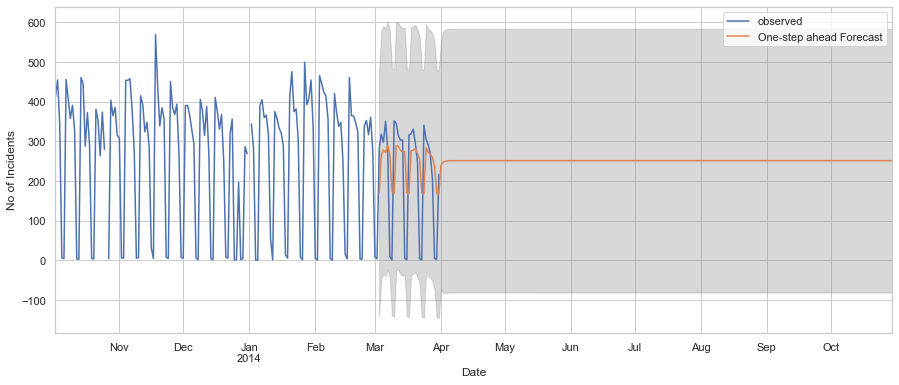

In [411]:
ax = data2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()

### Task 3 - Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

In [412]:
df

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions
0,subapplication,Web Based Application,Closed,4,4,4.0,0.601292,incident,closed,0.0,05-02-2012 13:32,04-11-2013 13:50,04-11-2013 13:51,Other,1.0
1,application,Web Based Application,Closed,3,3,3.0,0.415050,incident,closed,0.0,12-03-2012 15:44,02-12-2013 12:36,02-12-2013 12:36,Software,1.0
3,application,Web Based Application,Closed,4,4,4.0,0.642927,incident,closed,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,Operator error,1.0
4,application,Web Based Application,Closed,4,4,4.0,0.345258,incident,closed,2.0,10-08-2012 11:01,08-11-2013 13:55,08-11-2013 13:55,Other,1.0
5,application,Web Based Application,Closed,4,4,4.0,0.006676,incident,closed,4.0,10-08-2012 11:27,08-11-2013 13:54,08-11-2013 13:54,Other,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,application,Server Based Application,Closed,4,4,4.0,0.231896,incident,closed,0.0,31-03-2014 16:23,31-03-2014 16:29,31-03-2014 16:29,Other,1.0
46602,application,Server Based Application,Closed,4,4,4.0,0.805153,incident,closed,0.0,31-03-2014 15:03,31-03-2014 15:29,31-03-2014 15:29,User error,1.0
46603,computer,Laptop,Closed,5,5,5.0,0.917466,incident,closed,0.0,31-03-2014 15:28,31-03-2014 15:32,31-03-2014 15:32,Hardware,1.0
46604,application,Web Based Application,Closed,4,4,4.0,0.701278,incident,closed,0.0,31-03-2014 15:35,31-03-2014 15:42,31-03-2014 15:42,Software,1.0


Here, category would be target


In [413]:
label_map = {}
for column in df.drop(['Category','Status','Open_Time','Resolved_Time','Close_Time'],axis=1):
    value_counts = df[column].value_counts()
    label_map[column] = {value: idx for idx, value in enumerate(value_counts.index)}
    
for col in df.drop(['Category','Status','Open_Time','Resolved_Time','Close_Time'],axis=1):
        df[col]=df[col].map(label_map[col])

In [414]:
df['Category'].value_counts()

Category
incident                   36413
request for information     8801
complaint                     11
request for change             1
Name: count, dtype: int64

Dataset is heavily imbalanced and to predict request for change, we need more data for the same

## Summary

The project is done with the purpose of:

1. Finding out factors which affects priority and training a model which accurately predicts it so that preventive measures can be taken for High Priority Tickets and reassigning can be reduced.
2. Finding out factors which affect RFC and predicting it.
3. Forecasting Incident Volume in the future so that they can be better prepared with resources and technology planning.


**The following steps are carried out**:

1. Importing the data, necessary libraries, & exploring the data to look for missing values.
2. Selecting the features for analysis, label encoding the ordinal column and splitting the data into test & train.
3. Training the data using algorithms like Support Vector Machine, Decision Tree, Random Forest, K-Nearest Neighbor, XGBoost Classifier and Artificial Neural Network and checking the accuracy to find out which algorithm is the best.
4. Exporting the model with highest accuracy.
5. For Incident Volume Forecasting, Ticket Opening Time is taken and Time Series Forecasting is used.

## Results:

- For predicting Ticket Priority, SVC gives almost 99.4% accuracy. Random Forest and Decision Tree are overfitting and to overcome this, we could try hyperparameter tuning or prune extra branches.
- Predicting RFC accurately is not possible with this data. And Volume Forecasting is visualized with the help of Matplotlib throughout the year.